In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from matplotlib import pyplot
import astropy.constants
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [4]:
def magnitude(vector):
    return np.sqrt(vector[0] ** 2.0 + vector[1] ** 2.0 + vector[2] ** 2.0)

In [3]:
class Particle(object):
    def __init__(self, initial_position, initial_velocity, mass, number_time_steps):
        self.position = np.zeros((number_time_steps, 3))
        self.position[0] = initial_position
        self.velocity =  np.zeros((number_time_steps, 3))
        self.velocity[0] = initial_velocity
        self.acceleration = np.zeros((number_time_steps, 3))
        self.mass = mass
        self.pvec = np.zeros((number_time_steps, 3))
        self.pvec[0] = mass * np.cross(initial_position, initial_velocity)
        self.pmag = np.zeros((number_time_steps, 1))
        self.pmag[0] = magnitude(mass * np.cross(initial_position, initial_velocity))
        self.emag = np.zeros((number_time_steps, 1))
        self.speed = np.zeros((number_time_steps, 1))
        self.speed[0] = magnitude(initial_velocity)
        
    def update_position(self, t):
        self.position[t] = self.position[t - 1]
        self.position[t] += self.velocity[t - 1] * delta_t
        self.position[t] += 0.5 * self.acceleration[t - 1] * delta_t * delta_t
    
    def update_velocity(self, t):
        self.velocity[t] = self.velocity[t - 1]
        self.velocity[t] += 0.5 * delta_t * (self.acceleration[t] + self.acceleration[t - 1])
    
    def update_acceleration(self, t, particles):
        for particle in particles:
            if particle != self:
                r12 = particle.vector_to(self.position, t)
                self.acceleration[t] += G * np.asarray(particle.mass) * r12 / magnitude(r12) ** 3.0
        
    def vector_to(self, position1, t):
        return self.position[t] - position1[t]
    
    def p_vector(self, t):
        self.pvec[t] = self.mass * np.cross(self.position[t], self.velocity[t])
        
    def p_magnitude(self, t):
        self.pmag[t] = magnitude(self.pvec[t])
        
    def e_magnitude(self, t, particles):
        for particle in particles:
            if particle != self:
                r12 = particle.vector_to(self.position, t)
                self.emag[t] = 0.5 * self.mass * np.dot(self.velocity[t], self.velocity[t]) -G * self.mass * np.asarray(particle.mass) / magnitude(r12)
                
    def update_speed(self, t):
        self.speed[t] = magnitude(self.velocity[t])

Distances in Au, Speeds in Au/day, Times in days, DateStamp at 2018-01-01

In [5]:
number_of_time_steps =15000
delta_t = 1.0
G = astropy.constants.G.to('AU**3 / (day**2 * earthMass)').value

In [6]:
A_sun = 4.356559457609672E-03
e_sun = 5.915467101099848E-01
OM_sun = np.deg2rad(1.068996484463902E+02)
w_sun = np.deg2rad(1.664131442629285E+02)
TA_sun = np.deg2rad(1.602852597902436E+02)
i_sun = np.deg2rad(1.963245728840758)
GM_sun = 7.1301670739887768E-13
EA_sun = np.arccos((np.cos(TA_sun) + e_sun) / (1 + e_sun * np.cos(TA_sun)))
r_sun = A_sun * (1 - e_sun * np.cos(EA_sun))
p_sun = A_sun * (1 - e_sun ** 2.0)
h_sun = (GM_sun * A_sun * (1 - e_sun ** 2.0)) ** 0.5
mass_sun = 332946.0487

X_sun = r_sun * (np.cos(OM_sun) * np.cos(w_sun + TA_sun) - np.sin(OM_sun) * np.sin(w_sun + TA_sun) * np.cos(i_sun))
Y_sun = r_sun * (np.sin(OM_sun) * np.cos(w_sun + TA_sun) + np.cos(OM_sun) * np.sin(w_sun + TA_sun) * np.cos(i_sun))
Z_sun = r_sun * (np.sin(i_sun) * np.sin(w_sun + TA_sun))

Xdot_sun = (X_sun * h_sun * e_sun / (r_sun * p_sun)) * np.sin(TA_sun) - (h_sun / r_sun) * (np.cos(OM_sun) * np.sin(w_sun + TA_sun) + np.sin(OM_sun) * np.cos(w_sun + TA_sun) * np.cos(i_sun))
Ydot_sun = (Y_sun * h_sun * e_sun / (r_sun * p_sun)) * np.sin(TA_sun) - (h_sun / r_sun) * (np.sin(OM_sun) * np.sin(w_sun + TA_sun) - np.cos(OM_sun) * np.cos(w_sun + TA_sun) * np.cos(i_sun))
Zdot_sun = (Z_sun * h_sun * e_sun / (r_sun * p_sun)) * np.sin(TA_sun) + (h_sun / r_sun) * np.sin(i_sun) * np.cos(w_sun + TA_sun)

In [7]:
A_mer = 3.827925387702584E-01
e_mer = 1.908030727445678E-01
OM_mer = np.deg2rad(4.800986563717257E+01)
w_mer = np.deg2rad(2.74389993361835E+01)
TA_mer = np.deg2rad(1.045867371118504E+02)
i_mer = np.deg2rad(6.946604618245831)
GM_mer = 2.9630912754977030E-04
EA_mer = np.arccos((np.cos(TA_mer) + e_mer) / (1 + e_mer * np.cos(TA_mer)))
r_mer = A_mer * (1 - e_mer * np.cos(EA_mer))
p_mer = A_mer * (1 - e_mer ** 2.0)
h_mer = (GM_mer * A_mer * (1 - e_mer ** 2.0)) ** 0.5
mass_mer = 0.0553

X_mer = r_mer * (np.cos(OM_mer) * np.cos(w_mer + TA_mer) - np.sin(OM_mer) * np.sin(w_mer + TA_mer) * np.cos(i_mer))
Y_mer = r_mer * (np.sin(OM_mer) * np.cos(w_mer + TA_mer) + np.cos(OM_mer) * np.sin(w_mer + TA_mer) * np.cos(i_mer))
Z_mer = r_mer * (np.sin(i_mer) * np.sin(w_mer + TA_mer))

Xdot_mer = (X_mer * h_mer * e_mer / (r_mer * p_mer)) * np.sin(TA_mer) - (h_mer / r_mer) * (np.cos(OM_mer) * np.sin(w_mer + TA_mer) + np.sin(OM_mer) * np.cos(w_mer + TA_mer) * np.cos(i_mer))
Ydot_mer = (Y_mer * h_mer * e_mer / (r_mer * p_mer)) * np.sin(TA_mer) - (h_mer / r_mer) * (np.sin(OM_mer) * np.sin(w_mer + TA_mer) - np.cos(OM_mer) * np.cos(w_mer + TA_mer) * np.cos(i_mer))
Zdot_mer = (Z_mer * h_mer * e_mer / (r_mer * p_mer)) * np.sin(TA_mer) + (h_mer / r_mer) * np.sin(i_mer) * np.cos(w_mer + TA_mer)

In [8]:
A_ven = 7.104320085498409E-01
e_ven = 1.696528056189046E-02
OM_ven = np.deg2rad(7.650564394281598E+01)
w_ven = np.deg2rad(4.348299134284241E+01)
TA_ven = np.deg2rad(1.558463600234089E+02)
i_ven = np.deg2rad(3.397771919311012)
GM_ven = 2.9630710189377173E-04
EA_ven = np.arccos((np.cos(TA_ven) + e_ven) / (1 + e_ven * np.cos(TA_ven)))
r_ven = A_ven * (1 - e_ven * np.cos(EA_ven))
p_ven = A_ven * (1 - e_ven ** 2.0)
h_ven = (GM_ven * A_ven * (1 - e_ven ** 2.0)) ** 0.5
mass_ven = 0.815

X_ven = r_ven * (np.cos(OM_ven) * np.cos(w_ven + TA_ven) - np.sin(OM_ven) * np.sin(w_ven + TA_ven) * np.cos(i_ven))
Y_ven = r_ven * (np.sin(OM_ven) * np.cos(w_ven + TA_ven) + np.cos(OM_ven) * np.sin(w_ven + TA_ven) * np.cos(i_ven))
Z_ven = r_ven * (np.sin(i_ven) * np.sin(w_ven + TA_ven))

Xdot_ven = (X_ven * h_ven * e_ven / (r_ven * p_ven)) * np.sin(TA_ven) - (h_ven / r_ven) * (np.cos(OM_ven) * np.sin(w_ven + TA_ven) + np.sin(OM_ven) * np.cos(w_ven + TA_ven) * np.cos(i_ven))
Ydot_ven = (Y_ven * h_ven * e_ven / (r_ven * p_ven)) * np.sin(TA_ven) - (h_ven / r_ven) * (np.sin(OM_ven) * np.sin(w_ven + TA_ven) - np.cos(OM_ven) * np.cos(w_ven + TA_ven) * np.cos(i_ven))
Zdot_ven = (Z_ven * h_ven * e_ven / (r_ven * p_ven)) * np.sin(TA_ven) + (h_ven / r_ven) * np.sin(i_ven) * np.cos(w_ven + TA_ven)

In [9]:
A_earth = 1.010102253656228
e_earth = 2.115219083862255E-02
OM_earth = np.deg2rad(1.925883354167051E+02)
w_earth = np.deg2rad(2.769917922037592E+02)
TA_earth = np.deg2rad(3.505185076238286E+02)
i_earth = np.deg2rad(9.174141474443072E-03)
GM_earth = 2.9630660862442341E-04
EA_earth = np.arccos((np.cos(TA_earth) + e_earth) / (1 + e_earth * np.cos(TA_earth)))
r_earth = A_earth * (1 - e_earth * np.cos(EA_earth))
p_earth = A_earth * (1 - e_earth ** 2.0)
h_earth = (GM_earth * A_earth * (1 - e_earth ** 2.0)) ** 0.5
mass_earth = 1.0

X_earth = r_earth * (np.cos(OM_earth) * np.cos(w_earth + TA_earth) - np.sin(OM_earth) * np.sin(w_earth + TA_earth) * np.cos(i_earth))
Y_earth = r_earth * (np.sin(OM_earth) * np.cos(w_earth + TA_earth) + np.cos(OM_earth) * np.sin(w_earth + TA_earth) * np.cos(i_earth))
Z_earth = r_earth * (np.sin(i_earth) * np.sin(w_earth + TA_earth))

Xdot_earth = (X_earth * h_earth * e_earth / (r_earth * p_earth)) * np.sin(TA_earth) - (h_earth / r_earth) * (np.cos(OM_earth) * np.sin(w_earth + TA_earth) + np.sin(OM_earth) * np.cos(w_earth + TA_earth) * np.cos(i_earth))
Ydot_earth = (Y_earth * h_earth * e_earth / (r_earth * p_earth)) * np.sin(TA_earth) - (h_earth / r_earth) * (np.sin(OM_earth) * np.sin(w_earth + TA_earth) - np.cos(OM_earth) * np.cos(w_earth + TA_earth) * np.cos(i_earth))
Zdot_earth = (Z_earth * h_earth * e_earth / (r_earth * p_earth)) * np.sin(TA_earth) + (h_earth / r_earth) * np.sin(i_earth) * np.cos(w_earth + TA_earth)

In [10]:
A_moon = 1.097041930008708
e_moon = 9.650294756329222E-02
OM_moon = np.deg2rad(1.091330175893953E+02)
w_moon = np.deg2rad(3.477031756559746E+02)
TA_moon = np.deg2rad(3.225474851707679)
i_moon = np.deg2rad(1.193850223303395E-01)
GM_moon = 2.9630924212847702E-04
EA_moon = np.arccos((np.cos(TA_moon) + e_moon) / (1 + e_moon * np.cos(TA_moon)))
r_moon = A_moon * (1 - e_moon * np.cos(EA_moon))
p_moon = A_moon * (1 - e_moon ** 2.0)
h_moon = (GM_moon * A_moon * (1 - e_moon ** 2.0)) ** 0.5
mass_moon = 0.0123000371

X_moon = r_moon * (np.cos(OM_moon) * np.cos(w_moon + TA_moon) - np.sin(OM_moon) * np.sin(w_moon + TA_moon) * np.cos(i_moon))
Y_moon = r_moon * (np.sin(OM_moon) * np.cos(w_moon + TA_moon) + np.cos(OM_moon) * np.sin(w_moon + TA_moon) * np.cos(i_moon))
Z_moon = r_moon * (np.sin(i_moon) * np.sin(w_moon + TA_moon))

Xdot_moon = (X_moon * h_moon * e_moon / (r_moon * p_moon)) * np.sin(TA_moon) - (h_moon / r_moon) * (np.cos(OM_moon) * np.sin(w_moon + TA_moon) + np.sin(OM_moon) * np.cos(w_moon + TA_moon) * np.cos(i_moon))
Ydot_moon = (Y_moon * h_moon * e_moon / (r_moon * p_moon)) * np.sin(TA_moon) - (h_moon / r_moon) * (np.sin(OM_moon) * np.sin(w_moon + TA_moon) - np.cos(OM_moon) * np.cos(w_moon + TA_moon) * np.cos(i_moon))
Zdot_moon = (Z_moon * h_moon * e_moon / (r_moon * p_moon)) * np.sin(TA_moon) + (h_moon / r_moon) * np.sin(i_moon) * np.cos(w_moon + TA_moon)

In [11]:
A_mar = 1.515088330833452
e_mar = 9.843444935156705E-02
OM_mar = np.deg2rad(4.930980465615880E+01)
w_mar = np.deg2rad(2.869640406474606E+02)
TA_mar = np.deg2rad(2.173190302997779E+02)
i_mar = np.deg2rad(1.844892422913014)
GM_mar = 2.9630898843780145E-04
EA_mar = np.arccos((np.cos(TA_mar) + e_mar) / (1 + e_mar * np.cos(TA_mar)))
r_mar = A_mar * (1 - e_mar * np.cos(EA_mar))
p_mar = A_mar * (1 - e_mar ** 2.0)
h_mar = (GM_mar * A_mar * (1 - e_mar ** 2.0)) ** 0.5
mass_mar = 0.107

X_mar = r_mar * (np.cos(OM_mar) * np.cos(w_mar + TA_mar) - np.sin(OM_mar) * np.sin(w_mar + TA_mar) * np.cos(i_mar))
Y_mar = r_mar * (np.sin(OM_mar) * np.cos(w_mar + TA_mar) + np.cos(OM_mar) * np.sin(w_mar + TA_mar) * np.cos(i_mar))
Z_mar = r_mar * (np.sin(i_mar) * np.sin(w_mar + TA_mar))

Xdot_mar = (X_mar * h_mar * e_mar / (r_mar * p_mar)) * np.sin(TA_mar) - (h_mar / r_mar) * (np.cos(OM_mar) * np.sin(w_mar + TA_mar) + np.sin(OM_mar) * np.cos(w_mar + TA_mar) * np.cos(i_mar))
Ydot_mar = (Y_mar * h_mar * e_mar / (r_mar * p_mar)) * np.sin(TA_mar) - (h_mar / r_mar) * (np.sin(OM_mar) * np.sin(w_mar + TA_mar) - np.cos(OM_mar) * np.cos(w_mar + TA_mar) * np.cos(i_mar))
Zdot_mar = (Z_mar * h_mar * e_mar / (r_mar * p_mar)) * np.sin(TA_mar) + (h_mar / r_mar) * np.sin(i_mar) * np.cos(w_mar + TA_mar)

In [12]:
A_jup = 5.194733479265398
e_jup = 4.958343147084019E-02
OM_jup = np.deg2rad(1.005189857268031E+02)
w_jup = np.deg2rad(2.733567610595707E+02)
TA_jup = np.deg2rad(2.043955231409976E+02)
i_jup = np.deg2rad(1.303017628809368)
GM_jup = 2.9546265423765355E-04
EA_jup = np.arccos((np.cos(TA_jup) + e_jup) / (1 + e_jup * np.cos(TA_jup)))
r_jup = A_jup * (1 - e_jup * np.cos(EA_jup))
p_jup = A_jup * (1 - e_jup ** 2.0)
h_jup = (GM_jup * A_jup * (1 - e_jup ** 2.0)) ** 0.5
mass_jup = 317.83

X_jup = r_jup * (np.cos(OM_jup) * np.cos(w_jup + TA_jup) - np.sin(OM_jup) * np.sin(w_jup + TA_jup) * np.cos(i_jup))
Y_jup = r_jup * (np.sin(OM_jup) * np.cos(w_jup + TA_jup) + np.cos(OM_jup) * np.sin(w_jup + TA_jup) * np.cos(i_jup))
Z_jup = r_jup * (np.sin(i_jup) * np.sin(w_jup + TA_jup))

Xdot_jup = (X_jup * h_jup * e_jup / (r_jup * p_jup)) * np.sin(TA_jup) - (h_jup / r_jup) * (np.cos(OM_jup) * np.sin(w_jup + TA_jup) + np.sin(OM_jup) * np.cos(w_jup + TA_jup) * np.cos(i_jup))
Ydot_jup = (Y_jup * h_jup * e_jup / (r_jup * p_jup)) * np.sin(TA_jup) - (h_jup / r_jup) * (np.sin(OM_jup) * np.sin(w_jup + TA_jup) - np.cos(OM_jup) * np.cos(w_jup + TA_jup) * np.cos(i_jup))
Zdot_jup = (Z_jup * h_jup * e_jup / (r_jup * p_jup)) * np.sin(TA_jup) + (h_jup / r_jup) * np.sin(i_jup) * np.cos(w_jup + TA_jup)

In [13]:
A_sat = 9.540353089676781
e_sat = 5.437590051262039E-02
OM_sat = np.deg2rad(1.135890100729469E+02)
w_sat = np.deg2rad(3.390503000185154E+02)
TA_sat = np.deg2rad(1.776139183488646E+02)
i_sat = np.deg2rad(2.487858873948251)
GM_sat = 2.9605561889295168E-04
EA_sat = np.arccos((np.cos(TA_sat) + e_sat) / (1 + e_sat * np.cos(TA_sat)))
r_sat = A_sat * (1 - e_sat * np.cos(EA_sat))
p_sat = A_sat * (1 - e_sat ** 2.0)
h_sat = (GM_sat * A_sat * (1 - e_sat ** 2.0)) ** 0.5
mass_sat = 95.2

X_sat = r_sat * (np.cos(OM_sat) * np.cos(w_sat + TA_sat) - np.sin(OM_sat) * np.sin(w_sat + TA_sat) * np.cos(i_sat))
Y_sat = r_sat * (np.sin(OM_sat) * np.cos(w_sat + TA_sat) + np.cos(OM_sat) * np.sin(w_sat + TA_sat) * np.cos(i_sat))
Z_sat = r_sat * (np.sin(i_sat) * np.sin(w_sat + TA_sat))

Xdot_sat = (X_sat * h_sat * e_sat / (r_sat * p_sat)) * np.sin(TA_sat) - (h_sat / r_sat) * (np.cos(OM_sat) * np.sin(w_sat + TA_sat) + np.sin(OM_sat) * np.cos(w_sat + TA_sat) * np.cos(i_sat))
Ydot_sat = (Y_sat * h_sat * e_sat / (r_sat * p_sat)) * np.sin(TA_sat) - (h_sat / r_sat) * (np.sin(OM_sat) * np.sin(w_sat + TA_sat) - np.cos(OM_sat) * np.cos(w_sat + TA_sat) * np.cos(i_sat))
Zdot_sat = (Z_sat * h_sat * e_sat / (r_sat * p_sat)) * np.sin(TA_sat) + (h_sat / r_sat) * np.sin(i_sat) * np.cos(w_sat + TA_sat)

In [14]:
A_ura = 1.918745485620048E+01
e_ura = 4.736407750306303E-02
OM_ura = np.deg2rad(7.410778339077424E+01)
w_ura = np.deg2rad(9.695767954227739E+01)
TA_ura = np.deg2rad(2.160153946912549E+02)
i_ura = np.deg2rad(7.708167696577191E-01)
GM_ura = 2.9627051986442837E-04
EA_ura = np.arccos((np.cos(TA_ura) + e_ura) / (1 + e_ura * np.cos(TA_ura)))
r_ura = A_ura * (1 - e_ura * np.cos(EA_ura))
p_ura = A_ura * (1 - e_ura ** 2.0)
h_ura = (GM_ura * A_ura * (1 - e_ura ** 2.0)) ** 0.5
mass_ura = 14.5

X_ura = r_ura * (np.cos(OM_ura) * np.cos(w_ura + TA_ura) - np.sin(OM_ura) * np.sin(w_ura + TA_ura) * np.cos(i_ura))
Y_ura = r_ura * (np.sin(OM_ura) * np.cos(w_ura + TA_ura) + np.cos(OM_ura) * np.sin(w_ura + TA_ura) * np.cos(i_ura))
Z_ura = r_ura * (np.sin(i_ura) * np.sin(w_ura + TA_ura))

Xdot_ura = (X_ura * h_ura * e_ura / (r_ura * p_ura)) * np.sin(TA_ura) - (h_ura / r_ura) * (np.cos(OM_ura) * np.sin(w_ura + TA_ura) + np.sin(OM_ura) * np.cos(w_ura + TA_ura) * np.cos(i_ura))
Ydot_ura = (Y_ura * h_ura * e_ura / (r_ura * p_ura)) * np.sin(TA_ura) - (h_ura / r_ura) * (np.sin(OM_ura) * np.sin(w_ura + TA_ura) - np.cos(OM_ura) * np.cos(w_ura + TA_ura) * np.cos(i_ura))
Zdot_ura = (Z_ura * h_ura * e_ura / (r_ura * p_ura)) * np.sin(TA_ura) + (h_ura / r_ura) * np.sin(i_ura) * np.cos(w_ura + TA_ura)

In [15]:
A_nep = 3.007517699418755E+01
e_nep = 8.661000108355786E-03
OM_nep = np.deg2rad(1.318937114556519E+02)
w_nep = np.deg2rad(2.718199079505096E+02)
TA_nep = np.deg2rad(2.996229007728440E+02)
i_nep = np.deg2rad(1.775829639062517)
GM_nep = 2.9626355610476072E-04
EA_nep = np.arccos((np.cos(TA_nep) + e_nep) / (1 + e_nep * np.cos(TA_nep)))
r_nep = A_nep * (1 - e_nep * np.cos(EA_nep))
p_nep = A_nep * (1 - e_nep ** 2.0)
h_nep = (GM_nep * A_nep * (1 - e_nep ** 2.0)) ** 0.5
mass_nep = 17.1

X_nep = r_nep * (np.cos(OM_nep) * np.cos(w_nep + TA_nep) - np.sin(OM_nep) * np.sin(w_nep + TA_nep) * np.cos(i_nep))
Y_nep = r_nep * (np.sin(OM_nep) * np.cos(w_nep + TA_nep) + np.cos(OM_nep) * np.sin(w_nep + TA_nep) * np.cos(i_nep))
Z_nep = r_nep * (np.sin(i_nep) * np.sin(w_nep + TA_nep))

Xdot_nep = (X_nep * h_nep * e_nep / (r_nep * p_nep)) * np.sin(TA_nep) - (h_nep / r_nep) * (np.cos(OM_nep) * np.sin(w_nep + TA_nep) + np.sin(OM_nep) * np.cos(w_nep + TA_nep) * np.cos(i_nep))
Ydot_nep = (Y_nep * h_nep * e_nep / (r_nep * p_nep)) * np.sin(TA_nep) - (h_nep / r_nep) * (np.sin(OM_nep) * np.sin(w_nep + TA_nep) - np.cos(OM_nep) * np.cos(w_nep + TA_nep) * np.cos(i_nep))
Zdot_nep = (Z_nep * h_nep * e_nep / (r_nep * p_nep)) * np.sin(TA_nep) + (h_nep / r_nep) * np.sin(i_nep) * np.cos(w_nep + TA_nep)

In [16]:
A_plu = 3.921396646414203E+01
e_plu = 2.478903158194412E-01
OM_plu = np.deg2rad(1.102902414622192E+02)
w_plu = np.deg2rad(1.121158511461924E+02)
TA_plu = np.deg2rad(6.630898836375287E+01)
i_plu = np.deg2rad(1.725559575330361E+01)
GM_plu = 2.9630926910899889E-04
EA_plu = np.arccos((np.cos(TA_plu) + e_plu) / (1 + e_plu * np.cos(TA_plu)))
r_plu = A_plu * (1 - e_plu * np.cos(EA_plu))
p_plu = A_plu * (1 - e_plu ** 2.0)
h_plu = (GM_plu * A_plu * (1 - e_plu ** 2.0)) ** 0.5
mass_plu = 0.0025

X_plu = r_plu * (np.cos(OM_plu) * np.cos(w_plu + TA_plu) - np.sin(OM_plu) * np.sin(w_plu + TA_plu) * np.cos(i_plu))
Y_plu = r_plu * (np.sin(OM_plu) * np.cos(w_plu + TA_plu) + np.cos(OM_plu) * np.sin(w_plu + TA_plu) * np.cos(i_plu))
Z_plu = r_plu * (np.sin(i_plu) * np.sin(w_plu + TA_plu))

Xdot_plu = (X_plu * h_plu * e_plu / (r_plu * p_plu)) * np.sin(TA_plu) - (h_plu / r_plu) * (np.cos(OM_plu) * np.sin(w_plu + TA_plu) + np.sin(OM_plu) * np.cos(w_plu + TA_plu) * np.cos(i_plu))
Ydot_plu = (Y_plu * h_plu * e_plu / (r_plu * p_plu)) * np.sin(TA_plu) - (h_plu / r_plu) * (np.sin(OM_plu) * np.sin(w_plu + TA_plu) - np.cos(OM_plu) * np.cos(w_plu + TA_plu) * np.cos(i_plu))
Zdot_plu = (Z_plu * h_plu * e_plu / (r_plu * p_plu)) * np.sin(TA_plu) + (h_plu / r_plu) * np.sin(i_plu) * np.cos(w_plu + TA_plu)

In [17]:
A_cha = 4.198041378448564E+01
e_cha = 2.660407014632397E-01
OM_cha = np.deg2rad(1.103919723608681E+02)
w_cha = np.deg2rad(1.267900417376293E+02)
TA_cha = np.deg2rad(5.153723466673958E+01)
i_cha = np.deg2rad(1.622787599385288E+01)
GM_cha = 2.9630927421342841E-04
EA_cha = np.arccos((np.cos(TA_cha) + e_cha) / (1 + e_cha * np.cos(TA_cha)))
r_cha = A_cha * (1 - e_cha * np.cos(EA_cha))
p_cha = A_cha * (1 - e_cha ** 2.0)
h_cha = (GM_cha * A_cha * (1 - e_cha ** 2.0)) ** 0.5
mass_cha = 0.000266

X_cha = r_cha * (np.cos(OM_cha) * np.cos(w_cha + TA_cha) - np.sin(OM_cha) * np.sin(w_cha + TA_cha) * np.cos(i_cha))
Y_cha = r_cha * (np.sin(OM_cha) * np.cos(w_cha + TA_cha) + np.cos(OM_cha) * np.sin(w_cha + TA_cha) * np.cos(i_cha))
Z_cha = r_cha * (np.sin(i_cha) * np.sin(w_cha + TA_cha))

Xdot_cha = (X_cha * h_cha * e_cha / (r_cha * p_cha)) * np.sin(TA_cha) - (h_cha / r_cha) * (np.cos(OM_cha) * np.sin(w_cha + TA_cha) + np.sin(OM_cha) * np.cos(w_cha + TA_cha) * np.cos(i_cha))
Ydot_cha = (Y_cha * h_cha * e_cha / (r_cha * p_cha)) * np.sin(TA_cha) - (h_cha / r_cha) * (np.sin(OM_cha) * np.sin(w_cha + TA_cha) - np.cos(OM_cha) * np.cos(w_cha + TA_cha) * np.cos(i_cha))
Zdot_cha = (Z_cha * h_cha * e_cha / (r_cha * p_cha)) * np.sin(TA_cha) + (h_cha / r_cha) * np.sin(i_cha) * np.cos(w_cha + TA_cha)

In [18]:
#most values obtained from Planet 9's Wikipedia page, highly hypothetical/estimated
A_pl9 = 7.0E+02
e_pl9 = 6.0E-01
OM_pl9 = np.deg2rad(0)
w_pl9 = np.deg2rad(1.50E+02)
TA_pl9 = np.deg2rad(2.457624418536339E+01) #value from a random TNO at 2018-01-01
i_pl9 = np.deg2rad(3.0E+01)
GM_pl9 = 2.9630927492415936E-04 #value from a random TNO at 2018-01-01 (relatively the same for all objects beyond Jupiter)
EA_pl9 = np.arccos((np.cos(TA_pl9) + e_pl9) / (1 + e_pl9 * np.cos(TA_pl9)))
r_pl9 = A_pl9 * (1 - e_pl9 * np.cos(EA_pl9))
p_pl9 = A_pl9 * (1 - e_pl9 ** 2.0)
h_pl9 = (GM_pl9 * A_pl9 * (1 - e_pl9 ** 2.0)) ** 0.5
mass_pl9 = 10.0

X_pl9 = r_pl9 * (np.cos(OM_pl9) * np.cos(w_pl9 + TA_pl9) - np.sin(OM_pl9) * np.sin(w_pl9 + TA_pl9) * np.cos(i_pl9))
Y_pl9 = r_pl9 * (np.sin(OM_pl9) * np.cos(w_pl9 + TA_pl9) + np.cos(OM_pl9) * np.sin(w_pl9 + TA_pl9) * np.cos(i_pl9))
Z_pl9 = r_pl9 * (np.sin(i_pl9) * np.sin(w_pl9 + TA_pl9))

Xdot_pl9 = (X_pl9 * h_pl9 * e_pl9 / (r_pl9 * p_pl9)) * np.sin(TA_pl9) - (h_pl9 / r_pl9) * (np.cos(OM_pl9) * np.sin(w_pl9 + TA_pl9) + np.sin(OM_pl9) * np.cos(w_pl9 + TA_pl9) * np.cos(i_pl9))
Ydot_pl9 = (Y_pl9 * h_pl9 * e_pl9 / (r_pl9 * p_pl9)) * np.sin(TA_pl9) - (h_pl9 / r_pl9) * (np.sin(OM_pl9) * np.sin(w_pl9 + TA_pl9) - np.cos(OM_pl9) * np.cos(w_pl9 + TA_pl9) * np.cos(i_pl9))
Zdot_pl9 = (Z_pl9 * h_pl9 * e_pl9 / (r_pl9 * p_pl9)) * np.sin(TA_pl9) + (h_pl9 / r_pl9) * np.sin(i_pl9) * np.cos(w_pl9 + TA_pl9)

In [19]:
sun = Particle([X_sun, Y_sun, Z_sun], [Xdot_sun, Ydot_sun, Zdot_sun], mass_sun, number_of_time_steps)

mercury = Particle([X_mer, Y_mer, Z_mer], [Xdot_mer, Ydot_mer, Zdot_mer], mass_mer, number_of_time_steps)

venus = Particle([X_ven, Y_ven, Z_ven], [Xdot_ven, Ydot_ven, Zdot_ven], mass_ven, number_of_time_steps)

earth = Particle([X_earth, Y_earth, Z_earth], [Xdot_earth, Ydot_earth, Zdot_earth], mass_earth, number_of_time_steps)

moon = Particle([X_moon, Y_moon, Z_moon], [Xdot_moon, Ydot_moon, Zdot_moon], mass_moon, number_of_time_steps)

mars = Particle([X_mar, Y_mar, Z_mar], [Xdot_mar, Ydot_mar, Zdot_mar], mass_mar, number_of_time_steps)

jupiter = Particle([X_jup, Y_jup, Z_jup], [Xdot_jup, Ydot_jup, Zdot_jup], mass_jup, number_of_time_steps)

saturn = Particle([X_sat, Y_sat, Z_sat], [Xdot_sat, Ydot_sat, Zdot_sat], mass_sat, number_of_time_steps)

uranus = Particle([X_ura, Y_ura, Z_ura], [Xdot_ura, Ydot_ura, Zdot_ura], mass_ura, number_of_time_steps)

neptune = Particle([X_nep, Y_nep, Z_nep], [Xdot_nep, Ydot_nep, Zdot_nep], mass_nep, number_of_time_steps)

pluto = Particle([X_plu, Y_plu, Z_plu], [Xdot_plu, Ydot_plu, Zdot_plu], mass_plu, number_of_time_steps)

charon = Particle([X_cha, Y_cha, Z_cha], [Xdot_cha, Ydot_cha, Zdot_cha], mass_cha, number_of_time_steps)

planet9 = Particle([X_pl9, Y_pl9, Z_pl9], [Xdot_pl9, Ydot_pl9, Zdot_pl9], mass_pl9, number_of_time_steps)

particles = [sun, mercury, venus, earth, moon, mars, jupiter, saturn, uranus, neptune, pluto, charon, planet9]

In [33]:
for particle in particles:
    particle.update_acceleration(0, particles)
    particle.e_magnitude(0, particles)

In [34]:
for t in np.arange(1, number_of_time_steps):
    for particle in particles:
        particle.update_position(t)
    for particle in particles:
        particle.update_acceleration(t, particles)
    for particle in particles:
        particle.update_velocity(t)
    for particle in particles:
        particle.p_vector(t)
    for particle in particles:
        particle.p_magnitude(t)
    for particle in particles:
        particle.e_magnitude(t, particles)
    for particle in particles:
        particle.update_speed(t)

<IPython.core.display.Javascript object>


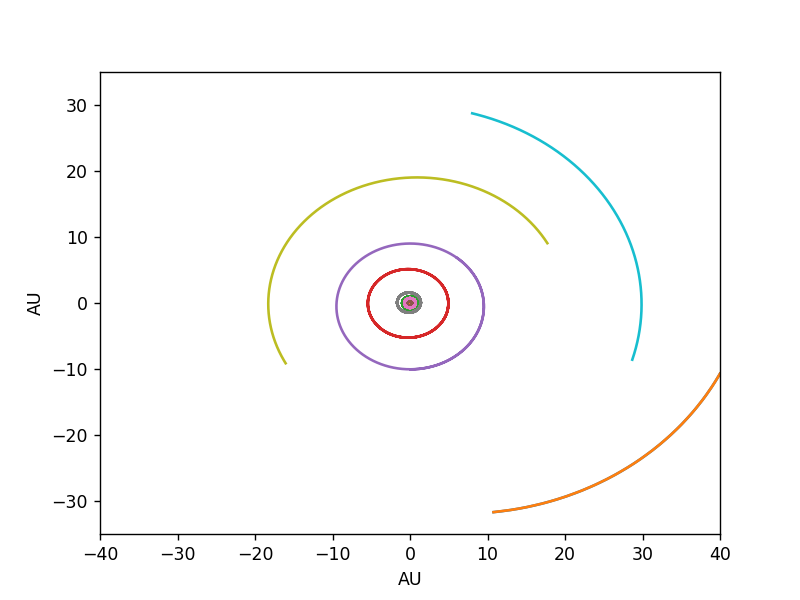

Text(0,0.5,'AU')

In [46]:
pyplot.plot(earth.position[:, 0], earth.position[:, 1])
pyplot.plot(sun.position[:, 0], sun.position[:, 1])
pyplot.plot(moon.position[:, 0], moon.position[:, 1])
pyplot.plot(jupiter.position[:, 0], jupiter.position[:, 1])
pyplot.plot(saturn.position[:, 0], saturn.position[:, 1])
pyplot.plot(mercury.position[:, 0], mercury.position[:, 1])
pyplot.plot(venus.position[:, 0], venus.position[:, 1])
pyplot.plot(mars.position[:, 0], mars.position[:, 1])
pyplot.plot(uranus.position[:, 0], uranus.position[:, 1])
pyplot.plot(neptune.position[:, 0], neptune.position[:, 1])
pyplot.plot(pluto.position[:, 0], pluto.position[:, 1])
pyplot.plot(charon.position[:, 0], charon.position[:, 1])
pyplot.plot(planet9.position[:, 0], planet9.position[:, 1])
pyplot.xlim (-40.0, 40.0)
pyplot.ylim(-35.0, 35.0)
pyplot.xlabel("AU")
pyplot.ylabel("AU")

<IPython.core.display.Javascript object>


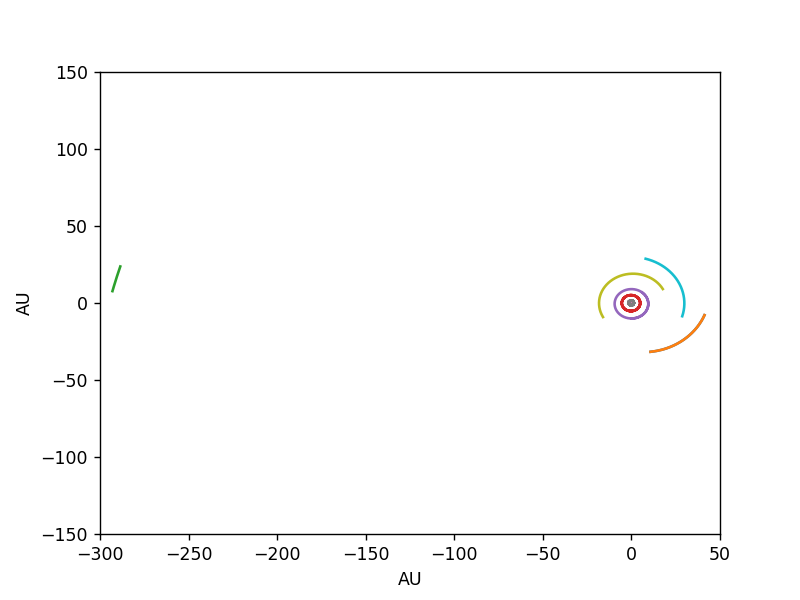

Text(0,0.5,'AU')

In [45]:
pyplot.plot(earth.position[:, 0], earth.position[:, 1])
pyplot.plot(sun.position[:, 0], sun.position[:, 1])
pyplot.plot(moon.position[:, 0], moon.position[:, 1])
pyplot.plot(jupiter.position[:, 0], jupiter.position[:, 1])
pyplot.plot(saturn.position[:, 0], saturn.position[:, 1])
pyplot.plot(mercury.position[:, 0], mercury.position[:, 1])
pyplot.plot(venus.position[:, 0], venus.position[:, 1])
pyplot.plot(mars.position[:, 0], mars.position[:, 1])
pyplot.plot(uranus.position[:, 0], uranus.position[:, 1])
pyplot.plot(neptune.position[:, 0], neptune.position[:, 1])
pyplot.plot(pluto.position[:, 0], pluto.position[:, 1])
pyplot.plot(charon.position[:, 0], charon.position[:, 1])
pyplot.plot(planet9.position[:, 0], planet9.position[:, 1])
pyplot.xlim (-300.0, 50.0)
pyplot.ylim(-150.0, 150.0)
pyplot.xlabel("AU")
pyplot.ylabel("AU")

<IPython.core.display.Javascript object>


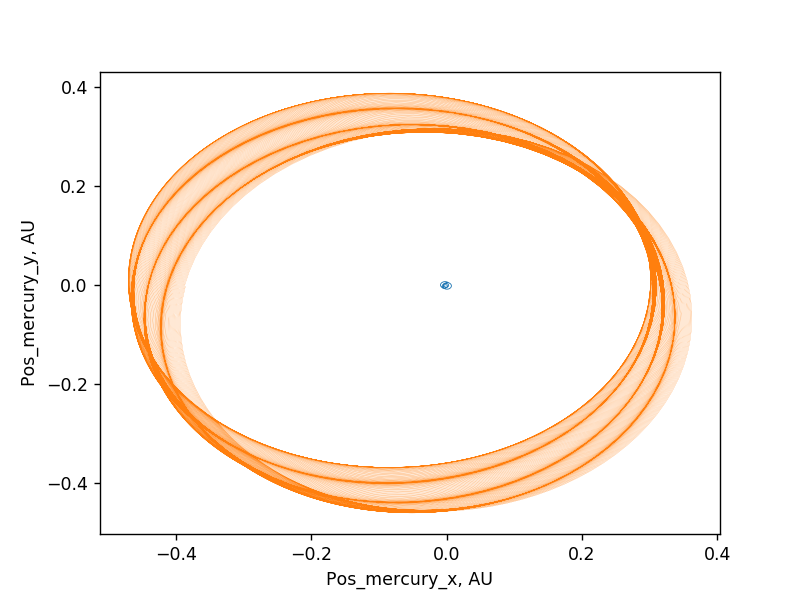

Text(0,0.5,'Pos_mercury_y, AU')

In [60]:
pyplot.plot(sun.position[:, 0], sun.position[:, 1], linewidth=0.5)
pyplot.plot(mercury.position[:, 0], mercury.position[:, 1], linewidth=0.1)
pyplot.xlabel("Pos_mercury_x, AU")
pyplot.ylabel("Pos_mercury_y, AU")

<IPython.core.display.Javascript object>


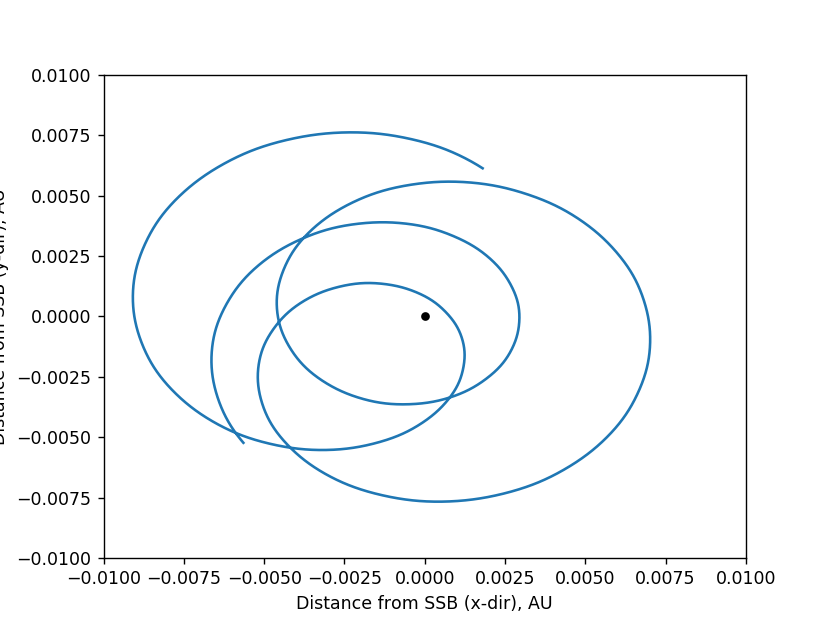

Text(0,0.5,'Distance from SSB (y-dir), AU')

In [44]:
pyplot.plot(sun.position[:, 0], sun.position[:, 1])
pyplot.plot(0, 0, marker="o", markersize=4, color='black')
pyplot.xlim(-0.01, 0.01)
pyplot.ylim(-0.01, 0.01)
pyplot.xlabel("Distance from SSB (x-dir), AU")
pyplot.ylabel("Distance from SSB (y-dir), AU")

<IPython.core.display.Javascript object>


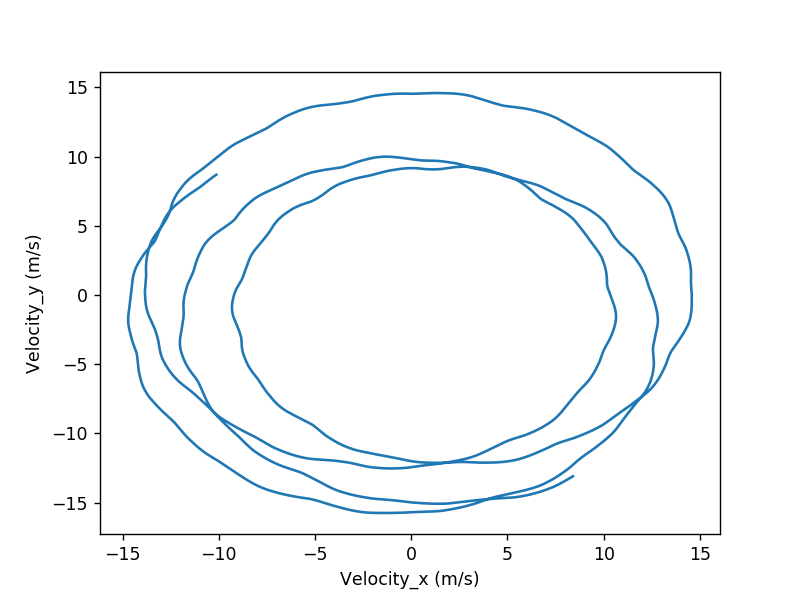

Text(0,0.5,'Velocity_y (m/s)')

In [38]:
pyplot.plot(sun.velocity[:, 0] * 1731456.837, sun.velocity[:, 1] * 1731456.837)
#1731456.837 is the conversion factor from AU/day to m/s
pyplot.xlabel("Velocity_x (m/s)")
pyplot.ylabel("Velocity_y (m/s)")

<IPython.core.display.Javascript object>


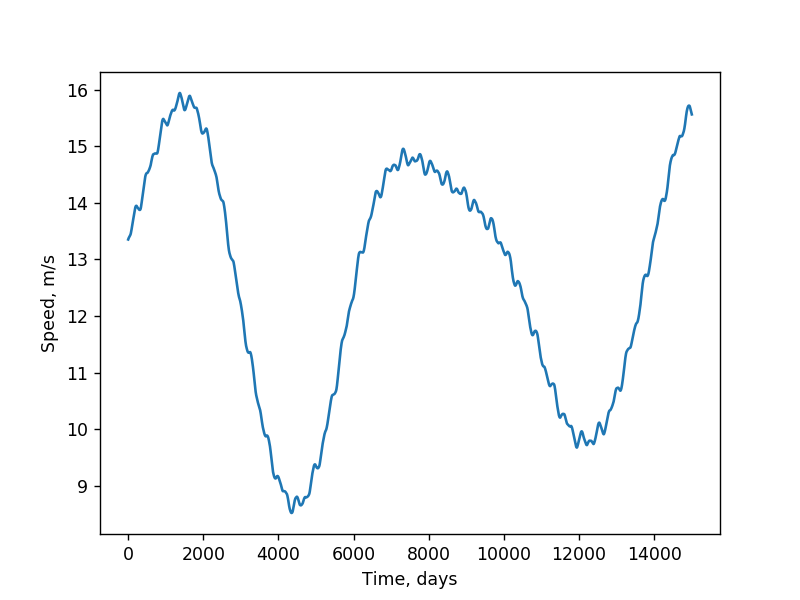

Text(0,0.5,'Speed, m/s')

In [43]:
pyplot.plot(np.arange(0, number_of_time_steps, 1), sun.speed * 1731456.837)
pyplot.xlabel("Time, days")
pyplot.ylabel("Speed, m/s")

<IPython.core.display.Javascript object>


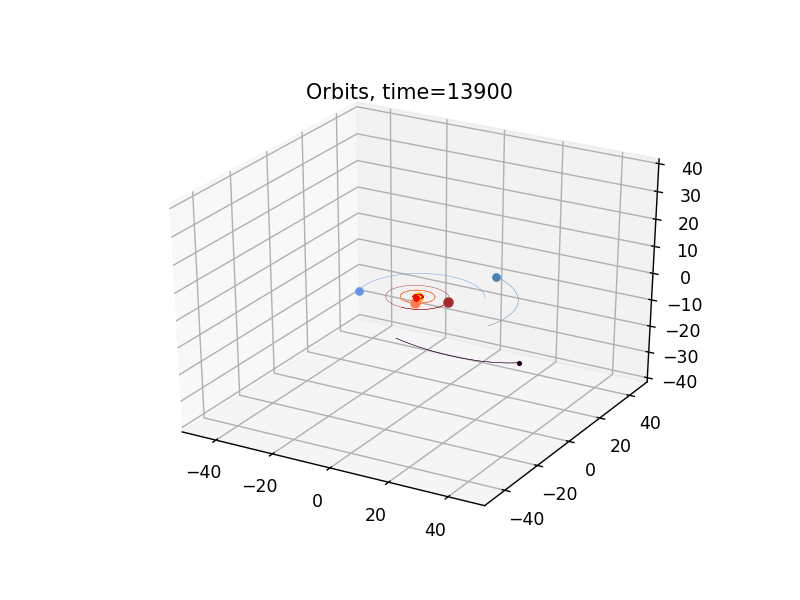

In [40]:
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('Orbits')
ax.set_xlim(-50.0, 50.0)
ax.set_ylim(-50.0, 50.0)
ax.set_zlim(-40, 40)

earth_plot, = ax.plot([X_earth], [Y_earth], [Z_earth], linestyle="", marker="o", markersize=3, color='blue')
earth_orbit_plot, = ax.plot(np.ones(10), np.zeros(10), np.zeros(10), linestyle="-", linewidth=0.25, color='blue')
sun_plot, = ax.plot([X_sun], [Y_sun], [Z_sun], linestyle="", marker="o", markersize=5, color='orange')
sun_orbit_plot, = ax.plot(np.ones(10), np.zeros(10), np.zeros(10), linestyle="-", linewidth=0.25)
moon_plot, = ax.plot([X_moon], [Y_moon], [Z_moon], linestyle="", marker="o",markersize=1, color='black')
moon_orbit_plot, = ax.plot(np.ones(10), np.zeros(10), np.zeros(10), linestyle="-", linewidth=0.25, color='black')
jupiter_plot, = ax.plot([X_jup], [Y_jup], [Z_jup], linestyle="", marker="o", markersize=5, color='coral')
jupiter_orbit_plot, = ax.plot(np.ones(10), np.zeros(10), np.zeros(10), linestyle="-", linewidth=0.25, color='coral')
saturn_plot, = ax.plot([X_sat], [Y_sat], [Z_sat], linestyle="", marker="o", markersize=5, color='brown')
saturn_orbit_plot, = ax.plot(np.ones(10), np.zeros(10), np.zeros(10), linestyle="-", linewidth=0.25, color='brown')
mercury_plot, = ax.plot([X_mer], [Y_mer], [Z_mer], linestyle="", marker="o", markersize=2, color='gray')
mercury_orbit_plot, = ax.plot(np.ones(10), np.zeros(10), np.zeros(10), linestyle="-", linewidth=0.25, color='gray')
venus_plot, = ax.plot([X_ven], [Y_ven], [Z_ven], linestyle="", marker="o", markersize=4, color='yellow')
venus_orbit_plot, = ax.plot(np.ones(10), np.zeros(10), np.zeros(10), linestyle="-", linewidth=0.25, color='yellow')
mars_plot, = ax.plot([X_mar], [Y_mar], [Z_mar], linestyle="", marker="o", markersize=3, color='red')
mars_orbit_plot, = ax.plot(np.ones(10), np.zeros(10), np.zeros(10), linestyle="-", linewidth=0.25, color='red')
uranus_plot, = ax.plot([X_ura], [Y_ura], [Z_ura], linestyle="", marker="o", markersize=4, color='cornflowerblue')
uranus_orbit_plot, = ax.plot(np.ones(10), np.zeros(10), np.zeros(10), linestyle="-", linewidth=0.25, color='cornflowerblue')
neptune_plot, = ax.plot([X_nep], [Y_nep], [Z_nep], linestyle="", marker="o", markersize=4, color='steelblue')
neptune_orbit_plot, = ax.plot(np.ones(10), np.zeros(10), np.zeros(10), linestyle="-", linewidth=0.25, color='steelblue')
pluto_plot, = ax.plot([X_plu], [Y_plu], [Z_plu], linestyle="", marker="o", markersize=2, color='purple')
pluto_orbit_plot, = ax.plot(np.ones(10), np.zeros(10), np.zeros(10), linestyle="-", linewidth=0.25, color='purple')
charon_plot, = ax.plot([X_cha], [Y_cha], [Z_cha], linestyle="", marker="o", markersize=1.5, color='black')
charon_orbit_plot, = ax.plot(np.ones(10), np.zeros(10), np.zeros(10), linestyle="-", linewidth=0.25, color='black')
planet9_plot, = ax.plot([X_pl9], [Y_pl9], [Z_pl9], linestyle="", marker="o", markersize=3.5, color='aqua')
planet9_orbit_plot, = ax.plot(np.ones(10), np.zeros(10), np.zeros(10), linestyle="-", linewidth=0.25, color='aqua')

def update_graph(num):
    earth_plot.set_data([earth.position[num, 0]], [earth.position[num, 1]])
    earth_plot.set_3d_properties([earth.position[num, 2]])
    earth_orbit_plot.set_data(earth.position[0:num:1, 0], earth.position[0:num:1, 1])
    earth_orbit_plot.set_3d_properties(earth.position[0:num:1, 2])
    sun_plot.set_data([sun.position[num, 0]], [sun.position[num, 1]])
    sun_plot.set_3d_properties([sun.position[num, 2]])
    sun_orbit_plot.set_data(sun.position[0:num:1, 0], sun.position[0:num:1, 1])
    sun_orbit_plot.set_3d_properties(sun.position[0:num:1, 2])
    moon_plot.set_data([moon.position[num, 0]], [earth.position[num, 1]])
    moon_plot.set_3d_properties([moon.position[num, 2]])
    moon_orbit_plot.set_data(moon.position[0:num:1, 0], moon.position[0:num:1, 1])
    moon_orbit_plot.set_3d_properties(moon.position[0:num:1, 2])
    jupiter_plot.set_data([jupiter.position[num, 0]], [jupiter.position[num, 1]])
    jupiter_plot.set_3d_properties([jupiter.position[num, 2]])
    jupiter_orbit_plot.set_data(jupiter.position[0:num:1, 0], jupiter.position[0:num:1, 1])
    jupiter_orbit_plot.set_3d_properties(jupiter.position[0:num:1, 2])
    saturn_plot.set_data([saturn.position[num, 0]], [saturn.position[num, 1]])
    saturn_plot.set_3d_properties([saturn.position[num, 2]])
    saturn_orbit_plot.set_data(saturn.position[0:num:1, 0], saturn.position[0:num:1, 1])
    saturn_orbit_plot.set_3d_properties(saturn.position[0:num:1, 2])
    mercury_plot.set_data([mercury.position[num, 0]], [mercury.position[num, 1]])
    mercury_plot.set_3d_properties([mercury.position[num, 2]])
    mercury_orbit_plot.set_data(mercury.position[0:num:1, 0], mercury.position[0:num:1, 1])
    mercury_orbit_plot.set_3d_properties(mercury.position[0:num:1, 2])
    venus_plot.set_data([venus.position[num, 0]], [venus.position[num, 1]])
    venus_plot.set_3d_properties([venus.position[num, 2]])
    venus_orbit_plot.set_data(venus.position[0:num:1, 0], venus.position[0:num:1, 1])
    venus_orbit_plot.set_3d_properties(venus.position[0:num:1, 2])
    mars_plot.set_data([mars.position[num, 0]], [mars.position[num, 1]])
    mars_plot.set_3d_properties([mars.position[num, 2]])
    mars_orbit_plot.set_data(mars.position[0:num:1, 0], mars.position[0:num:1, 1])
    mars_orbit_plot.set_3d_properties(mars.position[0:num:1, 2])
    uranus_plot.set_data([uranus.position[num, 0]], [uranus.position[num, 1]])
    uranus_plot.set_3d_properties([uranus.position[num, 2]])
    uranus_orbit_plot.set_data(uranus.position[0:num:1, 0], uranus.position[0:num:1, 1])
    uranus_orbit_plot.set_3d_properties(uranus.position[0:num:1, 2])
    neptune_plot.set_data([neptune.position[num, 0]], [neptune.position[num, 1]])
    neptune_plot.set_3d_properties([neptune.position[num, 2]])
    neptune_orbit_plot.set_data(neptune.position[0:num:1, 0], neptune.position[0:num:1, 1])
    neptune_orbit_plot.set_3d_properties(neptune.position[0:num:1, 2])
    pluto_plot.set_data([pluto.position[num, 0]], [pluto.position[num, 1]])
    pluto_plot.set_3d_properties([pluto.position[num, 2]])
    pluto_orbit_plot.set_data(pluto.position[0:num:1, 0], pluto.position[0:num:1, 1])
    pluto_orbit_plot.set_3d_properties(pluto.position[0:num:1, 2])
    charon_plot.set_data([charon.position[num, 0]], [charon.position[num, 1]])
    charon_plot.set_3d_properties([charon.position[num, 2]])
    charon_orbit_plot.set_data(charon.position[0:num:1, 0], charon.position[0:num:1, 1])
    charon_orbit_plot.set_3d_properties(charon.position[0:num:1, 2])
    planet9_plot.set_data([planet9.position[num, 0]], [planet9.position[num, 1]])
    planet9_plot.set_3d_properties([planet9.position[num, 2]])
    planet9_orbit_plot.set_data(planet9.position[0:num:1, 0], planet9.position[0:num:1, 1])
    planet9_orbit_plot.set_3d_properties(planet9.position[0:num:1, 2])
    title.set_text('Orbits, time={}'.format(num))
    return title, earth_plot, sun_plot, earth_orbit_plot, sun_orbit_plot, moon_plot, moon_orbit_plot, jupiter_plot, jupiter_orbit_plot, saturn_plot, saturn_orbit_plot, mercury_plot, mercury_orbit_plot, venus_plot, venus_orbit_plot, mars_plot, mars_orbit_plot, uranus_plot, uranus_orbit_plot, neptune_plot, neptune_orbit_plot, pluto_plot, pluto_orbit_plot, charon_plot, charon_orbit_plot, planet9_plot, planet9_orbit_plot,

FuncAnimation(fig, update_graph, range(0, 15000, 25), interval=30, blit=True)

<IPython.core.display.Javascript object>


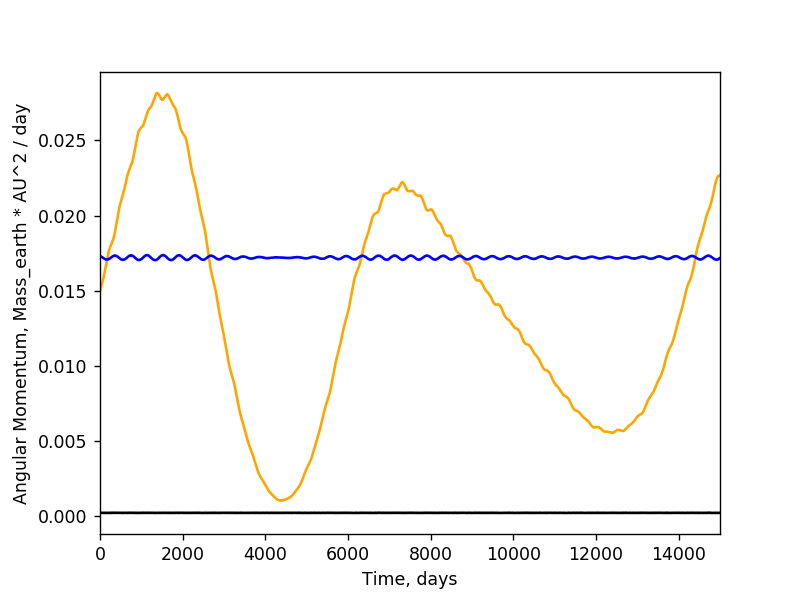

Text(0,0.5,'Angular Momentum, Mass_earth * AU^2 / day')

In [47]:
pyplot.plot(np.arange(0, number_of_time_steps, 1), sun.pmag, color='orange')
#pyplot.plot(np.arange(0, number_of_time_steps, 1), mercury.pmag, color='gray')
#pyplot.plot(np.arange(0, number_of_time_steps, 1), venus.pmag, color='yellow')
pyplot.plot(np.arange(0, number_of_time_steps, 1), earth.pmag, color='blue')
pyplot.plot(np.arange(0, number_of_time_steps, 1), moon.pmag, color='black')
#pyplot.plot(np.arange(0, number_of_time_steps, 1), mars.pmag, color='red')
#pyplot.plot(np.arange(0, number_of_time_steps, 1), jupiter.pmag, color='coral')
#pyplot.plot(np.arange(0, number_of_time_steps, 1), saturn.pmag, color='brown')
#pyplot.plot(np.arange(0, number_of_time_steps, 1), uranus.pmag, color='cornflowerblue')
#pyplot.plot(np.arange(0, number_of_time_steps, 1), neptune.pmag, color='steelblue')
#pyplot.plot(np.arange(0, number_of_time_steps, 1), pluto.pmag, color='bisque')
#pyplot.plot(np.arange(0, number_of_time_steps, 1), charon.pmag, color='beige')
#pyplot.plot(np.arange(0, number_of_time_steps, 1), planet9.pmag, color='aqua')
pyplot.xlim(0, number_of_time_steps)
pyplot.xlabel("Time, days")
pyplot.ylabel("Angular Momentum, Mass_earth * AU^2 / day")

<IPython.core.display.Javascript object>


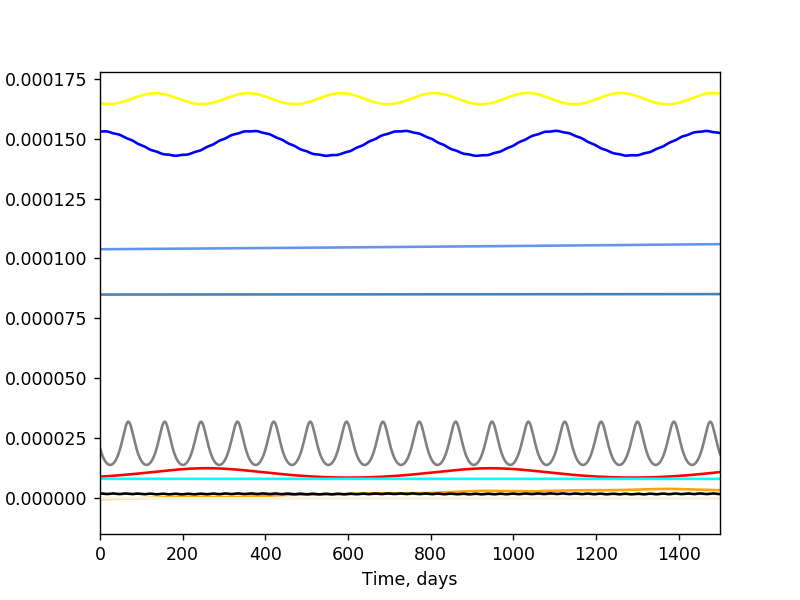

Text(0,0.5,'Total Energy, Mass_earth * AU^2 / day^2')

In [54]:
pyplot.plot(np.arange(0, number_of_time_steps, 1), sun.emag, color='orange')
pyplot.plot(np.arange(0, number_of_time_steps, 1), mercury.emag, color='gray')
pyplot.plot(np.arange(0, number_of_time_steps, 1), venus.emag, color='yellow')
pyplot.plot(np.arange(0, number_of_time_steps, 1), earth.emag, color='blue')
pyplot.plot(np.arange(0, number_of_time_steps, 1), moon.emag, color='black')
pyplot.plot(np.arange(0, number_of_time_steps, 1), mars.emag, color='red')
#pyplot.plot(np.arange(0, number_of_time_steps, 1), jupiter.emag, color='coral')
#pyplot.plot(np.arange(0, number_of_time_steps, 1), saturn.emag, color='brown')
pyplot.plot(np.arange(0, number_of_time_steps, 1), uranus.emag, color='cornflowerblue')
pyplot.plot(np.arange(0, number_of_time_steps, 1), neptune.emag, color='steelblue')
pyplot.plot(np.arange(0, number_of_time_steps, 1), pluto.emag, color='bisque')
pyplot.plot(np.arange(0, number_of_time_steps, 1), charon.emag, color='beige')
pyplot.plot(np.arange(0, number_of_time_steps, 1), planet9.emag, color='aqua')
pyplot.xlim(0, number_of_time_steps / 10)
pyplot.xlabel("Time, days")
pyplot.ylabel("Total Energy, Mass_earth * AU^2 / day^2")